In [1]:
import pandas as pd
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-06-06 09:54:08.573066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 09:54:08.765716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-06 09:54:08.765750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-06 09:54:08.802032: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-06 09:54:09.945520: W tensorflow/stream_executor/pla

In [2]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [3]:
df = pd.read_csv('Reviews-1.csv')
df

,sentiment,reviews,translated_reviews
0,0,teacher are punctual but they should also give...,guru tepat waktu tetapi mereka juga harus memb...
1,1,Good,Bagus
2,1,Excellent lectures are delivered by teachers a...,Kuliah yang sangat baik disampaikan oleh guru ...
3,1,Good,Bagus
4,1,teachers give us all the information required ...,Guru memberi kami semua informasi yang diperlu...
...,...,...,...
1105,1,they all are held in super,Mereka semua ditahan di Super
1106,1,good,Bagus
1107,1,the extracurricular activities held in univers...,Kegiatan ekstrakurikuler yang diadakan di univ...
1108,1,Our university has lot of extracurricular goin...,Universitas kami memiliki banyak ekstrakurikul...


<AxesSubplot: >

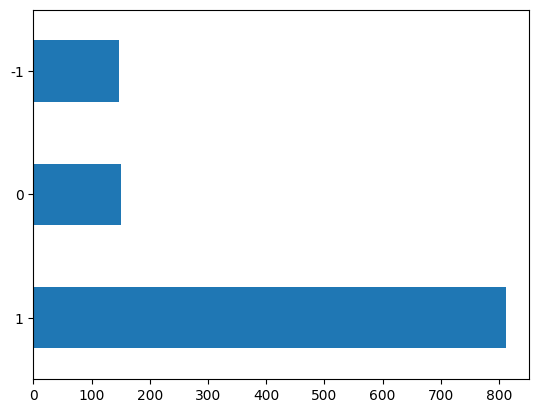

In [4]:
df['sentiment'].value_counts().plot(kind='barh')

From the output cell above, we know there is an imbalance of data between the 1 value and the others. So we need to reduce the data, so the 1 value will be around 150

In [5]:
df_dummy = df.copy()
df_dummy['translated_reviews'] = df_dummy['translated_reviews'].str.lower()

In [6]:
import string

def remove_punctuations(text):
    # Create a translation table with punctuations mapped to None
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuations from the text using translate() function
    text_without_punctuations = text.translate(translator)
    return text_without_punctuations

# Example usage
text = "Hello.......World! How are you?"
text_without_punctuations = remove_punctuations(text)
print(text_without_punctuations)

HelloWorld How are you


In [7]:
for i in range(len(df_dummy)):
    a = remove_punctuations(df_dummy['translated_reviews'][i])
    df_dummy['translated_reviews'][i] = a

/tmp/ipykernel_154/693067210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['translated_reviews'][i] = a


In [8]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

bagus 314
bagus sekali 51
sangat bagus 31
ratarata 24
ini baik 14
semuanya bagus 10
ya 8
oke 7
mereka bagus 6
tidak buruk 6
luar biasa 5
memuaskan 5
tidak baik 5
super 4
buruk 4
sempurna 4
tepat 4
itu sangat bagus 3
tidak seharusnya ada penilaian negatif 3
tidak begitu baik 3
lebih baik 3
membutuhkan beberapa perbaikan 3
puas 3
semuanya baikbaik saja 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
cukup baik 3
fasilitas perpustakaan bagus 3
terbaik 3
bagus menyediakan platform yang bagus 3
semua buku tidak tersedia 2
perlu melakukan perbaikan 2
itu bagus 2
cukup bagus 2
kursus sangat bagus dan bermanfaat 2
sangat buruk tidak ada peralatan 2
semuanya baik 2
itu cukup bagus dan unik 2
memang sangat bagus 2
kerja keras 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
itu sangat baik 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
buku yang tidak memadai 2
t

### Removing Duplicates Data

1. "bagus"

In [9]:
df_dummy[df_dummy['translated_reviews'] =='bagus']

,sentiment,reviews,translated_reviews
1,1,Good,bagus
3,1,Good,bagus
8,1,Good,bagus
9,1,Good,bagus
11,1,Good,bagus
...,...,...,...
1074,1,good,bagus
1081,1,good,bagus
1095,1,good,bagus
1100,1,good..,bagus


In [10]:
for i in range(1106, 2, -1):
    if df_dummy['translated_reviews'][i] == 'bagus':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)


In [11]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

bagus sekali 51
sangat bagus 31
ratarata 24
ini baik 14
semuanya bagus 10
ya 8
oke 7
mereka bagus 6
tidak buruk 6
luar biasa 5
tidak baik 5
memuaskan 5
buruk 4
super 4
sempurna 4
tepat 4
membutuhkan beberapa perbaikan 3
tidak begitu baik 3
puas 3
cukup baik 3
bagus menyediakan platform yang bagus 3
lebih baik 3
terbaik 3
itu sangat bagus 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
semuanya baikbaik saja 3
fasilitas perpustakaan bagus 3
tidak seharusnya ada penilaian negatif 3
itu bagus 2
pola pemeriksaan bagus 2
semuanya baik 2
turun 2
memang sangat bagus 2
sangat buruk tidak ada peralatan 2
perlu melakukan perbaikan 2
buku yang tidak memadai 2
semua buku tidak tersedia 2
cukup bagus 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
kursus sangat bagus dan bermanfaat 2
lumayan 2
sangat buruk 2
kerja keras 2
kerja bagus 2
itu cukup bagus dan unik 2
pengajaran dan man

In [12]:
len(df_dummy)

797

2. "bagus sekali"

In [13]:
df_dummy[df_dummy['translated_reviews'] =='bagus sekali']

,sentiment,reviews,translated_reviews
64,1,EXCELLENT,bagus sekali
71,1,excellent,bagus sekali
103,1,excellent,bagus sekali
205,1,Excellent,bagus sekali
214,1,excellent,bagus sekali
217,1,excellent,bagus sekali
221,1,Excellent,bagus sekali
237,1,excellent,bagus sekali
243,1,excellent,bagus sekali
247,1,Excellent,bagus sekali


In [14]:
df_dummy[df_dummy['translated_reviews'] == 'bagus sekali']
for i in range(796, 70, -1):
    if df_dummy['translated_reviews'][i] == 'bagus sekali':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

In [15]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

sangat bagus 31
ratarata 24
ini baik 14
semuanya bagus 10
ya 8
oke 7
tidak buruk 6
mereka bagus 6
tidak baik 5
luar biasa 5
memuaskan 5
super 4
buruk 4
tepat 4
sempurna 4
cukup baik 3
bagus menyediakan platform yang bagus 3
lebih baik 3
itu sangat bagus 3
puas 3
tidak begitu baik 3
tidak seharusnya ada penilaian negatif 3
membutuhkan beberapa perbaikan 3
semuanya baikbaik saja 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
fasilitas perpustakaan bagus 3
terbaik 3
memang sangat bagus 2
itu bagus 2
pola pemeriksaan bagus 2
kerja bagus 2
kursus sangat bagus dan bermanfaat 2
sangat buruk tidak ada peralatan 2
semua buku tidak tersedia 2
buku yang tidak memadai 2
turun 2
cukup bagus 2
lumayan 2
semua aktivasi bagus 2
semuanya baik 2
perlu melakukan perbaikan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
kerja keras 2
saya tidak berpartisipasi 2
itu sangat baik 2
pengaja

In [16]:
len(df_dummy)

747

3. "sangat bagus"

In [17]:
df_dummy[df_dummy['translated_reviews'] =='sangat bagus']

,sentiment,reviews,translated_reviews
56,1,very good,sangat bagus
59,1,very good.,sangat bagus
143,1,Very good,sangat bagus
192,1,very good,sangat bagus
193,1,very good,sangat bagus
203,1,Very good,sangat bagus
205,1,very good,sangat bagus
288,1,Very good,sangat bagus
289,1,Very good,sangat bagus
323,1,Very good,sangat bagus


In [18]:
df_dummy[df_dummy['translated_reviews'] == 'sangat bagus']
for i in range(746, 58, -1):
    if df_dummy['translated_reviews'][i] == 'sangat bagus':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

In [19]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

ratarata 24
ini baik 14
semuanya bagus 10
ya 8
oke 7
mereka bagus 6
tidak buruk 6
luar biasa 5
memuaskan 5
tidak baik 5
buruk 4
super 4
sempurna 4
tepat 4
puas 3
bagus menyediakan platform yang bagus 3
tidak begitu baik 3
tidak seharusnya ada penilaian negatif 3
membutuhkan beberapa perbaikan 3
lebih baik 3
cukup baik 3
terbaik 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
semuanya baikbaik saja 3
itu sangat bagus 3
fasilitas perpustakaan bagus 3
memang sangat bagus 2
pola pemeriksaan bagus 2
semuanya baik 2
kursus sangat bagus dan bermanfaat 2
itu bagus 2
perlu melakukan perbaikan 2
semua buku tidak tersedia 2
sangat buruk tidak ada peralatan 2
buku yang tidak memadai 2
turun 2
cukup bagus 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
lumayan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
itu cukup bagus dan unik 2
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerj

In [20]:
len(df_dummy)

717

4. "rata-rata"

In [21]:
df_dummy[df_dummy['translated_reviews'] == 'ratarata']

,sentiment,reviews,translated_reviews
31,0,average,ratarata
32,0,average,ratarata
33,0,average,ratarata
40,0,average,ratarata
51,0,average,ratarata
79,0,average,ratarata
168,0,average,ratarata
184,0,average,ratarata
209,0,average,ratarata
268,0,Average,ratarata


In [22]:
df_dummy[df_dummy['translated_reviews'] == 'ratarata']
for i in range(716, 31, -1):
    if df_dummy['translated_reviews'][i] == 'ratarata':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

In [23]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

ini baik 14
semuanya bagus 10
ya 8
oke 7
mereka bagus 6
tidak buruk 6
memuaskan 5
luar biasa 5
tidak baik 5
super 4
tepat 4
sempurna 4
buruk 4
tidak seharusnya ada penilaian negatif 3
membutuhkan beberapa perbaikan 3
tidak begitu baik 3
bagus menyediakan platform yang bagus 3
puas 3
lebih baik 3
cukup baik 3
terbaik 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
semuanya baikbaik saja 3
itu sangat bagus 3
fasilitas perpustakaan bagus 3
pola ujian bagus dan pemeriksaan kertas yang bagus 2
lumayan 2
turun 2
semuanya baik 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
buku yang tidak memadai 2
semua buku tidak tersedia 2
pola pemeriksaan bagus 2
memang sangat bagus 2
itu bagus 2
sangat buruk tidak ada peralatan 2
kursus sangat bagus dan bermanfaat 2
cukup bagus 2
perlu melakukan perbaikan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
saya tidak berpartisipasi 2
pengajaran dan manajemen yang sangat baik t

In [24]:
len(df_dummy)

694

5. "ini baik"

In [25]:
df_dummy[df_dummy['translated_reviews'] == 'ini baik']

,sentiment,reviews,translated_reviews
6,1,It is good,ini baik
17,1,It's good,ini baik
28,1,It's good,ini baik
152,1,Its good,ini baik
226,1,its good,ini baik
299,1,it is good,ini baik
384,1,Its good,ini baik
387,1,It's good,ini baik
388,1,It's good,ini baik
457,1,Its Good,ini baik


In [26]:
df_dummy[df_dummy['translated_reviews'] == 'ini baik']
for i in range(693, 10, -1):
    if df_dummy['translated_reviews'][i] == 'ini baik':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

In [27]:
# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

semuanya bagus 10
ya 8
oke 7
tidak buruk 6
mereka bagus 6
memuaskan 5
luar biasa 5
tidak baik 5
super 4
tepat 4
sempurna 4
buruk 4
tidak seharusnya ada penilaian negatif 3
membutuhkan beberapa perbaikan 3
cukup baik 3
tidak begitu baik 3
puas 3
lebih baik 3
terbaik 3
fasilitas perpustakaan bagus 3
semuanya baikbaik saja 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
itu sangat bagus 3
bagus menyediakan platform yang bagus 3
pola pemeriksaan bagus 2
memang sangat bagus 2
perlu melakukan perbaikan 2
semuanya baik 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
semua buku tidak tersedia 2
itu bagus 2
sangat buruk tidak ada peralatan 2
turun 2
kursus sangat bagus dan bermanfaat 2
cukup bagus 2
lumayan 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
buku yang tidak memadai 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
saya tidak berpartisipasi 2
pengajaran dan manajemen yang sangat baik tetapi terlal

In [28]:
len(df_dummy)

681

6. "semuanya bagus"

In [29]:
df_dummy[df_dummy['translated_reviews'] == 'semuanya bagus']

,sentiment,reviews,translated_reviews
38,1,all things are good,semuanya bagus
39,1,all things are good,semuanya bagus
69,1,all are good,semuanya bagus
258,1,all good,semuanya bagus
281,1,all things are good,semuanya bagus
301,1,all good,semuanya bagus
355,1,all are good,semuanya bagus
376,1,All good,semuanya bagus
513,1,all are good,semuanya bagus
595,1,All good,semuanya bagus


In [30]:
for i in range(680, 38, -1):
    if df_dummy['translated_reviews'][i] == 'semuanya bagus':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

ya 8
oke 7
tidak buruk 6
mereka bagus 6
memuaskan 5
luar biasa 5
tidak baik 5
super 4
buruk 4
sempurna 4
tepat 4
itu sangat bagus 3
lebih baik 3
tidak begitu baik 3
puas 3
cukup baik 3
bagus menyediakan platform yang bagus 3
membutuhkan beberapa perbaikan 3
tidak seharusnya ada penilaian negatif 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
semuanya baikbaik saja 3
terbaik 3
fasilitas perpustakaan bagus 3
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerja 2
turun 2
sangat buruk tidak ada peralatan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
perlu melakukan perbaikan 2
semuanya baik 2
lumayan 2
kerja bagus 2
cukup bagus 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
semua buku tidak tersedia 2
kerja keras 2
kursus sangat bagus dan bermanfaat 2
memang sangat bagus 2
sangat buruk 2
itu sangat baik 2
saya tidak berpartisipasi 2
pola pemeriksaan bagus 2
pola u

In [31]:
len(df_dummy)

672

7. "oke"

In [32]:
df_dummy[df_dummy['translated_reviews'] == 'oke']

,sentiment,reviews,translated_reviews
157,1,ok,oke
211,1,ok,oke
274,1,ok,oke
322,1,ok,oke
422,1,ok,oke
576,1,ok,oke
596,1,ok,oke


In [33]:
for i in range(671, 160, -1):
    if df_dummy['translated_reviews'][i] == 'oke':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

ya 8
mereka bagus 6
tidak buruk 6
tidak baik 5
luar biasa 5
memuaskan 5
tepat 4
buruk 4
sempurna 4
super 4
terbaik 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
membutuhkan beberapa perbaikan 3
itu sangat bagus 3
bagus menyediakan platform yang bagus 3
cukup baik 3
semuanya baikbaik saja 3
puas 3
tidak seharusnya ada penilaian negatif 3
lebih baik 3
tidak begitu baik 3
fasilitas perpustakaan bagus 3
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerja 2
turun 2
itu bagus 2
kursus sangat bagus dan bermanfaat 2
lumayan 2
semua buku tidak tersedia 2
buku yang tidak memadai 2
sangat buruk tidak ada peralatan 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
memang sangat bagus 2
pola pemeriksaan bagus 2
cukup bagus 2
perlu melakukan perbaikan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
semuanya baik 2
sangat buruk 2
kerja bagus 2
pola ujian bagus dan pemeriksaan k

In [34]:
len(df_dummy)

666

8. "ya"

In [35]:
df_dummy[df_dummy['translated_reviews'] == 'ya']

,sentiment,reviews,translated_reviews
4,1,Yes,ya
125,1,Yes,ya
181,1,Yes,ya
243,1,Yes,ya
353,1,Yes,ya
457,1,Yes,ya
565,1,Yes,ya
661,1,Yes.,ya


In [36]:
for i in range(665, 5, -1):
    if df_dummy['translated_reviews'][i] == 'ya':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

tidak buruk 6
mereka bagus 6
memuaskan 5
luar biasa 5
tidak baik 5
sempurna 4
super 4
buruk 4
tepat 4
membutuhkan beberapa perbaikan 3
bagus menyediakan platform yang bagus 3
itu sangat bagus 3
cukup baik 3
puas 3
fasilitas perpustakaan bagus 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
tidak begitu baik 3
semuanya baikbaik saja 3
lebih baik 3
terbaik 3
tidak seharusnya ada penilaian negatif 3
semua buku tidak tersedia 2
sangat buruk tidak ada peralatan 2
buku yang tidak memadai 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
kursus sangat bagus dan bermanfaat 2
lumayan 2
memang sangat bagus 2
itu bagus 2
pola pemeriksaan bagus 2
turun 2
cukup bagus 2
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerja 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
itu cukup bagus dan unik 2
semua aktivasi bagus 2
kerja bagus 2
pola ujian bagus dan pemeriksaan kertas yang bag

In [37]:
len(df_dummy)

659

9. "mereka bagus"

In [38]:
df_dummy[df_dummy['translated_reviews'] == 'mereka bagus']

,sentiment,reviews,translated_reviews
484,1,they are good,mereka bagus
491,1,they are good,mereka bagus
516,1,They are good.,mereka bagus
550,1,They are good.,mereka bagus
553,1,They are good,mereka bagus
630,1,they are good,mereka bagus


In [39]:
for i in range(658, 490, -1):
    if df_dummy['translated_reviews'][i] == 'mereka bagus':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

tidak buruk 6
memuaskan 5
luar biasa 5
tidak baik 5
sempurna 4
super 4
buruk 4
tepat 4
lebih baik 3
bagus menyediakan platform yang bagus 3
itu sangat bagus 3
cukup baik 3
puas 3
membutuhkan beberapa perbaikan 3
fasilitas perpustakaan bagus 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
tidak begitu baik 3
semuanya baikbaik saja 3
terbaik 3
tidak seharusnya ada penilaian negatif 3
semua buku tidak tersedia 2
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerja 2
itu bagus 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
kursus sangat bagus dan bermanfaat 2
lumayan 2
memang sangat bagus 2
buku yang tidak memadai 2
pola pemeriksaan bagus 2
turun 2
cukup bagus 2
sangat buruk tidak ada peralatan 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
itu cukup bagus dan unik 2
semua aktivasi bagus 2
kerja bagus 2
pola ujian bagus dan pemeriksaan kertas yang bagus 2
saya tidak

In [40]:
len(df_dummy)

654

10. "tidak buruk"

In [41]:
df_dummy[df_dummy['translated_reviews'] == 'tidak buruk']

,sentiment,reviews,translated_reviews
108,1,not bad,tidak buruk
111,1,not bad..,tidak buruk
168,1,not bad,tidak buruk
255,1,Notbad,tidak buruk
275,1,not bad,tidak buruk
444,1,not bad,tidak buruk


In [42]:
for i in range(653, 110, -1):
    if df_dummy['translated_reviews'][i] == 'tidak buruk':
        df_dummy.drop(df_dummy.index[i], inplace=True)

df_dummy.reset_index(drop=True, inplace=True)

# Count the frequency of unique values in 'translated_reviews' column
value_counts = df_dummy['translated_reviews'].value_counts()

# Print the frequency counts
for unique_value, count in value_counts.items():
    print(unique_value, count)

luar biasa 5
memuaskan 5
tidak baik 5
super 4
tepat 4
sempurna 4
buruk 4
bagus menyediakan platform yang bagus 3
itu sangat bagus 3
puas 3
lebih baik 3
membutuhkan beberapa perbaikan 3
tidak begitu baik 3
fasilitas perpustakaan bagus 3
cukup baik 3
terbaik 3
fasilitas perpustakaan yang sangat bagus mengeluarkan waktu buku harus ditingkatkan 3
tidak seharusnya ada penilaian negatif 3
semuanya baikbaik saja 3
semuanya baik 2
turun 2
itu cukup bagus tergantung pada guru dan pengalaman mereka 2
pengajaran dan manajemen yang sangat baik tetapi terlalu banyak beban pada siswa dan jam kerja 2
sangat buruk tidak ada peralatan 2
sangat buruk 2
lumayan 2
itu sangat baik 2
pola pemeriksaan bagus tetapi menandai distribusi sangat membingungkan 2
semua buku tidak tersedia 2
perlu melakukan perbaikan 2
semua aktivasi bagus 2
itu cukup bagus dan unik 2
kerja keras 2
cukup bagus 2
pola pemeriksaan bagus 2
saya tidak berpartisipasi 2
memang sangat bagus 2
buku yang tidak memadai 2
pola ujian bagus dan 

In [43]:
df_dummy

,sentiment,reviews,translated_reviews
0,0,teacher are punctual but they should also give...,guru tepat waktu tetapi mereka juga harus memb...
1,1,Good,bagus
2,1,Excellent lectures are delivered by teachers a...,kuliah yang sangat baik disampaikan oleh guru ...
3,1,teachers give us all the information required ...,guru memberi kami semua informasi yang diperlu...
4,1,Yes,ya
...,...,...,...
644,-1,VERY HIGH......NEED TO TAKE DOWN SOME ACCITIVT...,sangat tinggi perlu mengurangi beberapa aktivi...
645,1,they all are held in super,mereka semua ditahan di super
646,1,the extracurricular activities held in univers...,kegiatan ekstrakurikuler yang diadakan di univ...
647,1,Our university has lot of extracurricular goin...,universitas kami memiliki banyak ekstrakurikul...


In [44]:
print("-1 :", df_dummy['sentiment'].value_counts()[-1])
print("0 :", df_dummy['sentiment'].value_counts()[0])
print("1 :", df_dummy['sentiment'].value_counts()[1])

-1 : 147
0 : 129
1 : 373


### Now we are going to export the data frame [df_dummy]

In [45]:
df_dummy.to_csv('Final-1.csv', index= False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ed2fb03-6b96-4478-88a0-fe62ee8d4496' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>